🔥 Analyze student exam scores to identify top performers, trends by city, and result categories 🔥

1️⃣ Import Libraries

In [57]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

2️⃣ Load Dataset


In [58]:
df = pd.read_csv("../Data/StudentsPerformance.csv")
pd.DataFrame(df.head())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


3️⃣ Data Cleaning

In [59]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [60]:
# Verify data types and convert if required
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [61]:
# Remove duplicates if any
df.drop_duplicates(inplace=True)

4️⃣ Feature Engineering

In [62]:
# Create Total Score column
df["Total Score"] = df["math score"] + df["reading score"] + df["writing score"]

In [63]:
# Create Result column:
def categorize_performance(score):
    if score >= 270:
        return "Distinction"
    elif score >= 210:
        return "Pass"
    else:
        return "Fail"
df["Result"] = df["Total Score"].apply(categorize_performance)

5️⃣ Filtering & Selection

In [64]:
# Filter top students
top_students = df[df["Result"] == "Distinction"]
print(top_students.head())

     gender race/ethnicity parental level of education     lunch  \
2    female        group B             master's degree  standard   
6    female        group B                some college  standard   
104    male        group C                some college  standard   
106  female        group D             master's degree  standard   
114  female        group E           bachelor's degree  standard   

    test preparation course  math score  reading score  writing score  \
2                      none          90             95             93   
6                 completed          88             95             92   
104               completed          98             86             90   
106                    none          87            100            100   
114               completed          99            100            100   

     Total Score       Result  
2            278  Distinction  
6            275  Distinction  
104          274  Distinction  
106          287  Distin

In [65]:
# Filter students who failed
failed_students = df[df["Result"] == "Fail"].sum()

In [66]:
# Filter students by gender
female_students = df[df["gender"] == "female"]
print(female_students.head())

   gender race/ethnicity parental level of education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   
2  female        group B             master's degree  standard   
5  female        group B          associate's degree  standard   
6  female        group B                some college  standard   

  test preparation course  math score  reading score  writing score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
5                    none          71             83             78   
6               completed          88             95             92   

   Total Score       Result  
0          218         Pass  
1          247         Pass  
2          278  Distinction  
5          232         Pass  
6          275  Distinctio

6️⃣ Grouping & Aggregation

In [67]:
# Average total score per Gender
avg_Score_by_gender = df.groupby("gender")["Total Score"].mean()
print(avg_Score_by_gender)

gender
female    208.708494
male      197.512448
Name: Total Score, dtype: float64


In [68]:
# Count of students per Result category
result_counts = df["Result"].value_counts()
print(result_counts)

Result
Fail           541
Pass           407
Distinction     52
Name: count, dtype: int64


In [69]:
# Count of students who completed test preparation course
test_prep_counts = df["test preparation course"].value_counts()
print(test_prep_counts)

test preparation course
none         642
completed    358
Name: count, dtype: int64


In [70]:
# Result of student who completed test preparation course
prep_course_results = df[df["test preparation course"] == "completed"][["Result"]].value_counts()
print(prep_course_results)

Result     
Pass           183
Fail           140
Distinction     35
Name: count, dtype: int64


7️⃣ Sorting

In [71]:
# Sort students by Total Score descending
sorted_Students = df.sort_values(by=["Total Score"], ascending=[False])
print(sorted_Students.head())

     gender race/ethnicity parental level of education     lunch  \
916    male        group E           bachelor's degree  standard   
458  female        group E           bachelor's degree  standard   
962  female        group E          associate's degree  standard   
114  female        group E           bachelor's degree  standard   
179  female        group D            some high school  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   
458                    none         100            100            100   
962                    none         100            100            100   
114               completed          99            100            100   
179               completed          97            100            100   

     Total Score       Result  
916          300  Distinction  
458          300  Distinction  
962          300  Distinction  
114          299  Distin

In [72]:
# Filter top 1 performing student and who also completed test preparation course
top_student = df[(df["Total Score"] == df["Total Score"].max()) & (df["test preparation course"] == "completed")]
print(top_student)

    gender race/ethnicity parental level of education     lunch  \
916   male        group E           bachelor's degree  standard   

    test preparation course  math score  reading score  writing score  \
916               completed         100            100            100   

     Total Score       Result  
916          300  Distinction  


8️⃣ Visualization

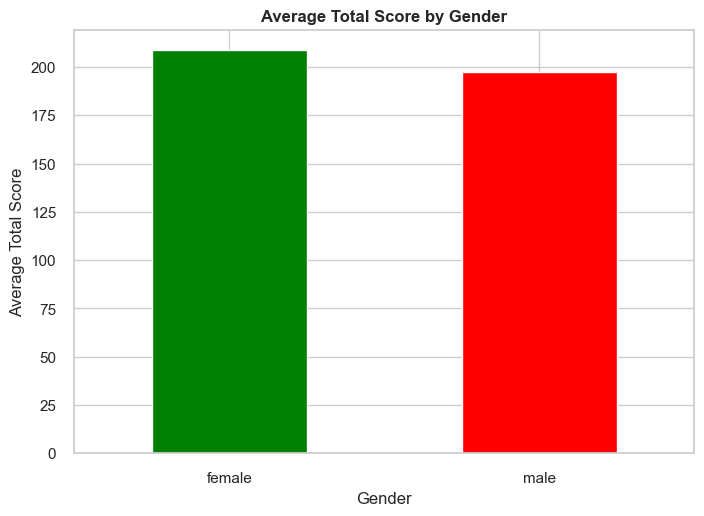

In [73]:
# Bar chart → Average score per gender
avg_Score_by_gender.plot(kind="bar", color=["green", "red"])
plt.title("Average Total Score by Gender")
plt.xlabel("Gender")
plt.ylabel("Average Total Score")
plt.xticks(rotation=0)
plt.show()


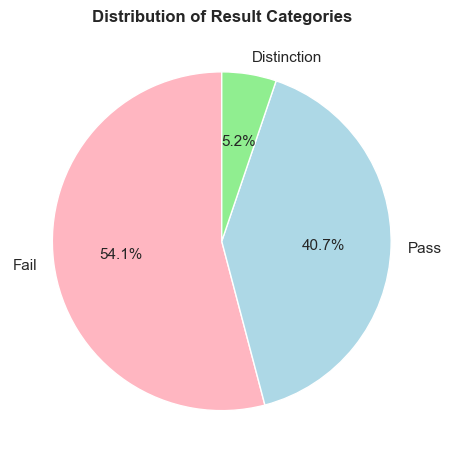

In [74]:
# Pie chart → Distribution of Result categories
result_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["lightpink", "lightblue", "lightgreen"])
plt.title("Distribution of Result Categories")
plt.ylabel("")
plt.show()

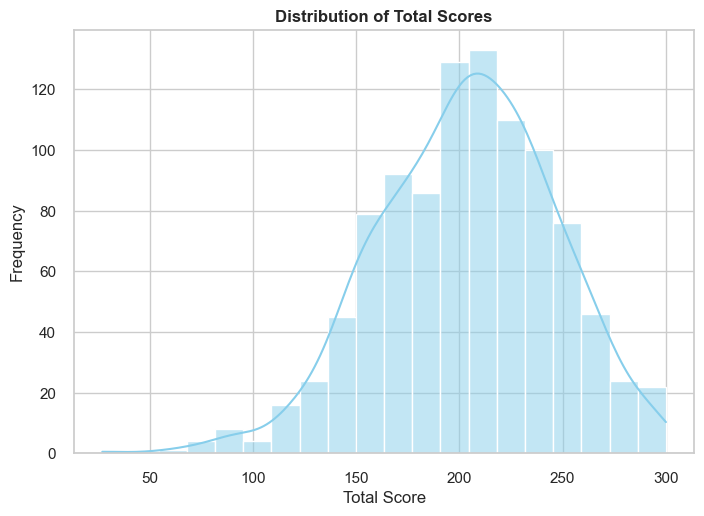

In [75]:
# Histogram → Total score distribution
sns.histplot(df["Total Score"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Total Scores")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

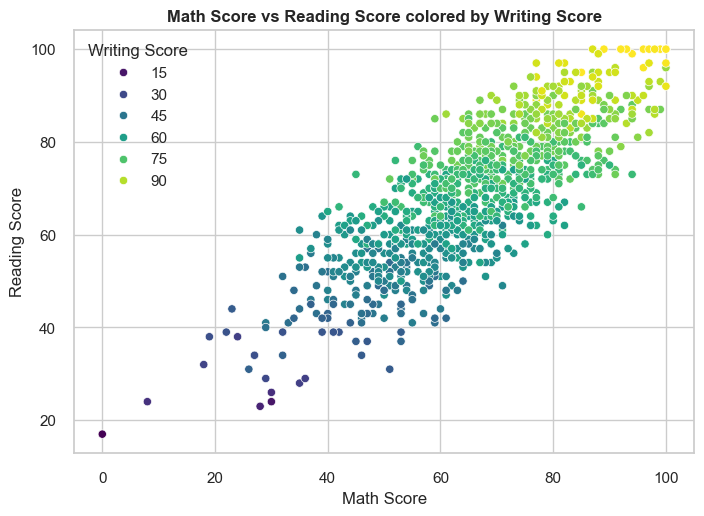

In [76]:
# Scatter plot → Math vs Reading vs Writing
sns.scatterplot(data=df, x="math score", y="reading score", hue="writing score", palette="viridis")
plt.title("Math Score vs Reading Score colored by Writing Score")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.legend(title="Writing Score")
plt.show()

9️⃣ Insights & Conclusion

In [77]:
# Identifying Top-performing group
top_group = df.groupby("parental level of education")["Total Score"].mean().idxmax()
print(f"Top-performing group: {top_group}")

Top-performing group: master's degree


In [78]:
# Indentifying Number of Distinction, Pass, Fail students
result_counts = df["Result"].value_counts()
print(result_counts)

Result
Fail           541
Pass           407
Distinction     52
Name: count, dtype: int64


In [79]:
# Identify patterns in performance based on test preparation course
test_prep_performance = df.groupby("test preparation course")["Result"].value_counts(normalize=False).unstack()
print(test_prep_performance)

Result                   Distinction  Fail  Pass
test preparation course                         
completed                         35   140   183
none                              17   401   224


C:\Users\MUBASHER\AppData\Local\Temp\ipykernel_5576\2137986639.py:124: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = ax4.boxplot(subjects, labels=subject_labels, patch_artist=True, widths=0.6, medianprops=dict(color='#000000'))


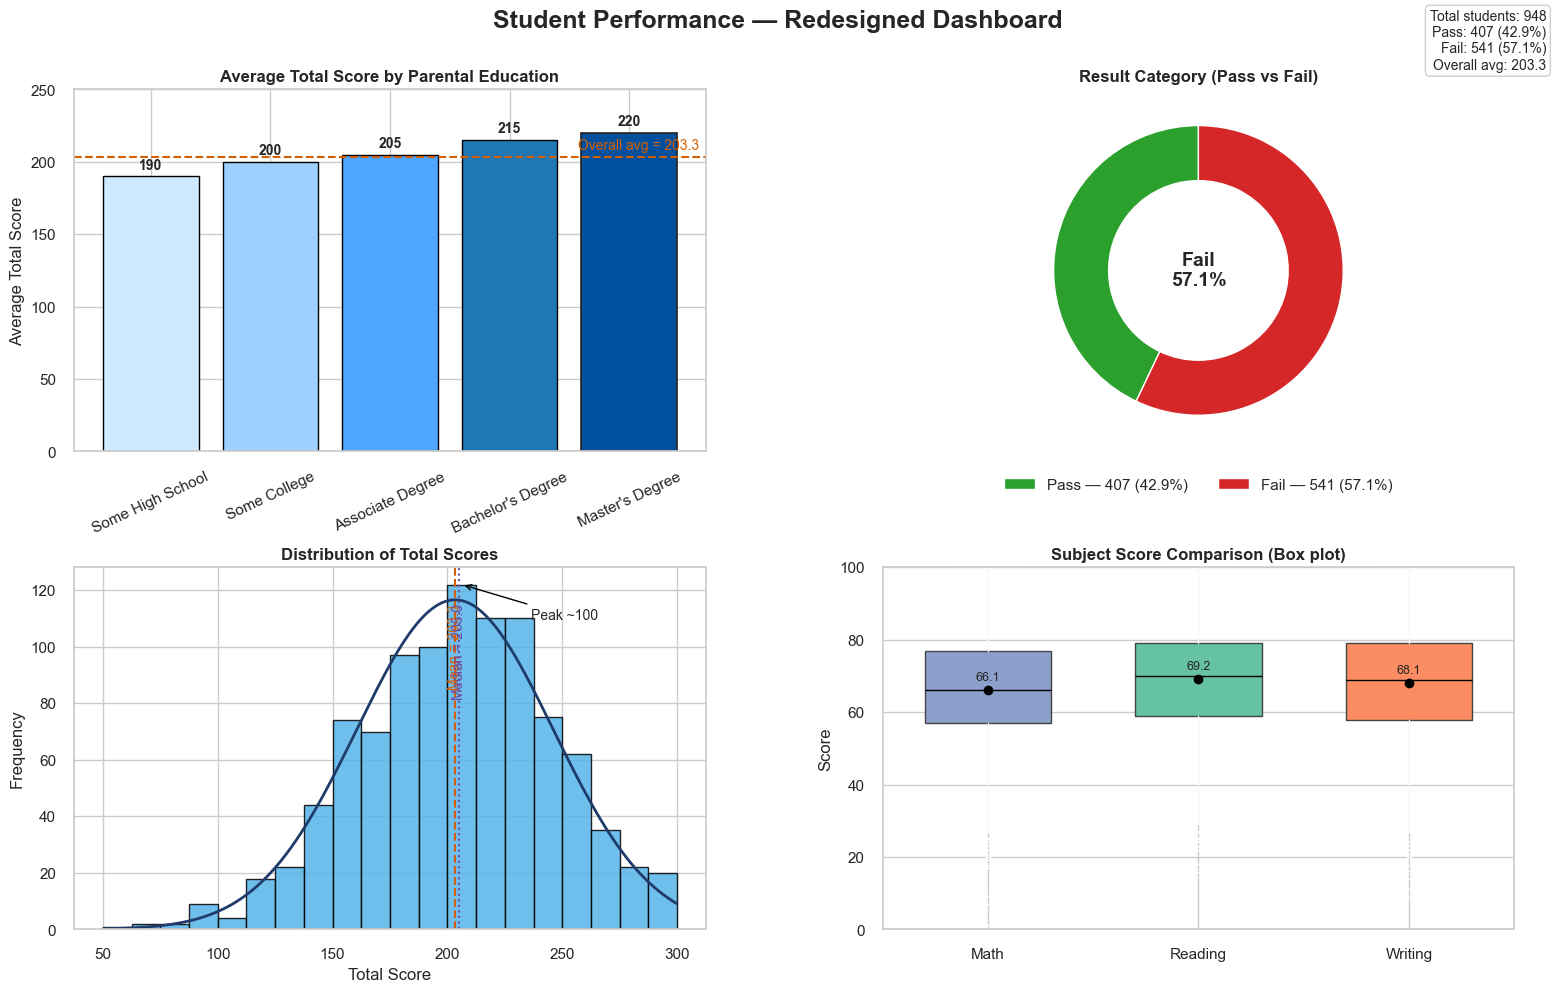

In [ ]:
# Student Performance Dashboard
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import scipy.stats as stats
import os

# --- Styling ---
sns.set_theme(style='whitegrid', context='notebook')
plt.rcParams.update({
    'font.size': 11,
    'axes.titlesize': 12,
    'axes.titleweight': 'bold',
    'figure.titlesize': 18,
    'figure.facecolor': 'white'
})

# --- Use provided fixed values for charts that require exact numbers ---
parents = ['Some High School', 'Some College', 'Associate Degree', "Bachelor's Degree", "Master's Degree"]
avg_scores = [190, 200, 205, 215, 220]
overall_avg = 203.3

# Provided result counts
result_counts = {'Pass': 407, 'Fail': 541}
total_provided = sum(result_counts.values())
pass_pct = result_counts['Pass'] / total_provided * 100
fail_pct = result_counts['Fail'] / total_provided * 100

# --- Load real data (for distribution & subject plots) if available ---
try:
    df
except NameError:
    df = pd.read_csv('../Data/StudentsPerformance.csv')

# Ensure Total Score exists
if 'Total Score' not in df.columns:
    df['Total Score'] = df.get('math score', 0) + df.get('reading score', 0) + df.get('writing score', 0)

# Compute stats from data for distribution
scores = df['Total Score'].dropna()
data_mean = float(scores.mean())
data_median = float(scores.median())
data_std = float(scores.std())

# Find histogram peak bin center (mode-ish)
counts, bin_edges = np.histogram(scores, bins=20, range=(50, 300))
peak_bin_idx = np.argmax(counts)
peak_x = (bin_edges[peak_bin_idx] + bin_edges[peak_bin_idx+1]) / 2

# Subject arrays for boxplot (use actual columns if present)
subjects = []
subject_labels = []
for col, label in [('math score','Math'), ('reading score','Reading'), ('writing score','Writing')]:
    if col in df.columns:
        subjects.append(df[col].dropna())
        subject_labels.append(label)

# If any subject missing, create small synthetic arrays using provided min/max hints
if len(subjects) < 3:
    # fallback: use narrow ranges as described
    subjects = [np.random.uniform(66, 68, size=100), np.random.uniform(60, 68, size=100), np.random.uniform(60, 68, size=100)]
    subject_labels = ['Math','Reading','Writing']

# --- Figure & layout ---
fig = plt.figure(figsize=(16,10), constrained_layout=False)
gs = gridspec.GridSpec(2, 2, figure=fig, height_ratios=[1,1], hspace=0.32, wspace=0.28)

# Chart 1: Parental Education (bar chart) — exact provided values
ax1 = fig.add_subplot(gs[0,0])
bar_colors = ['#cfe9ff', '#9ed1ff', '#4da6ff', '#1f77b4', '#00509e']
bars = ax1.bar(parents, avg_scores, color=bar_colors, edgecolor='black')
ax1.set_title('Average Total Score by Parental Education')
ax1.set_ylabel('Average Total Score')
ax1.set_ylim(0, 250)
ax1.tick_params(axis='x', rotation=25)
# Data labels
for b, val in zip(bars, avg_scores):
    ax1.text(b.get_x() + b.get_width()/2, val + 3, f'{val}', ha='center', va='bottom', fontsize=10, fontweight='semibold')
# Overall average line (provided exact)
ax1.axhline(overall_avg, color='#D55E00', linestyle='--', linewidth=1.5)
ax1.text(0.99, overall_avg + 3, f'Overall avg = {overall_avg:.1f}', ha='right', va='bottom', color='#D55E00', fontsize=10, transform=ax1.get_yaxis_transform())

# Highlight highest bar (Master's)
bars[-1].set_edgecolor('#222222')
bars[-1].set_linewidth(1.2)

# Chart 2: Result category (donut) — exact provided counts
ax2 = fig.add_subplot(gs[0,1])
values = [result_counts['Pass'], result_counts['Fail']]
labels = ['Pass','Fail']
colors = ['#2ca02c', '#d62728']
wedges, texts = ax2.pie(values, colors=colors, startangle=90, wedgeprops=dict(width=0.38, edgecolor='white'))
ax2.set_title('Result Category (Pass vs Fail)')
# Center text showing majority
majority = 'Pass' if pass_pct >= fail_pct else 'Fail'
center_text = f"{majority}\n{max(pass_pct, fail_pct):.1f}%"
ax2.text(0,0, center_text, ha='center', va='center', fontsize=14, fontweight='bold')
# Legend with counts
ax2.legend([f"{l} — {c} ({c/total_provided*100:.1f}%)" for l,c in zip(labels, values)], loc='lower center', bbox_to_anchor=(0.5,-0.15), ncol=2, frameon=False)

# Chart 3: Distribution (Histogram + Normal curve)
ax3 = fig.add_subplot(gs[1,0])
bins = np.linspace(50,300,21)
ax3.hist(scores, bins=bins, color='#56B4E9', edgecolor='black', alpha=0.85)
# Normal curve overlay using data mean/std
x = np.linspace(50,300,500)
pdf = stats.norm.pdf(x, data_mean, data_std) * (len(scores) * (bins[1]-bins[0]))
ax3.plot(x, pdf, color='#1f3b6a', lw=2)
ax3.set_title('Distribution of Total Scores')
ax3.set_xlabel('Total Score')
ax3.set_ylabel('Frequency')
# Mean & Median lines (from data)
ax3.axvline(data_mean, color='#D55E00', linestyle='--', linewidth=1.5)
ax3.text(data_mean, ax3.get_ylim()[1]*0.9, f'Mean = {data_mean:.1f}', rotation=90, color='#D55E00', va='top', ha='center', fontsize=10)
ax3.axvline(data_median, color='#6A51A3', linestyle=':', linewidth=1.5)
ax3.text(data_median, ax3.get_ylim()[1]*0.9, f'Median = {data_median:.1f}', rotation=90, color='#6A51A3', va='top', ha='center', fontsize=10)
# Annotate peak region (approx 100)
ax3.annotate('Peak ~100', xy=(peak_x, max(counts)), xytext=(peak_x+30, max(counts)*0.9), arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)

# Chart 4: Subject Scores (Box plots)
ax4 = fig.add_subplot(gs[1,1])
box = ax4.boxplot(subjects, labels=subject_labels, patch_artist=True, widths=0.6, medianprops=dict(color='#000000'))
colors_box = ['#8da0cb','#66c2a5','#fc8d62']
for patch, color in zip(box['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_edgecolor('#444444')
# Overlay means
for i, arr in enumerate(subjects):
    m = np.mean(arr)
    ax4.scatter(i+1, m, color='black', zorder=10)
    ax4.text(i+1, m + 1.8, f'{m:.1f}', ha='center', va='bottom', fontsize=9)
ax4.set_title('Subject Score Comparison (Box plot)')
ax4.set_ylim(0, 100)
ax4.set_ylabel('Score')

# Main title and KPI panel (top-center / small box)
fig.suptitle('Student Performance — Redesigned Dashboard', fontsize=18, fontweight='bold')
# KPI box: use provided totals for consistency
kpi_text = f"Total students: {total_provided}\nPass: {result_counts['Pass']} ({pass_pct:.1f}%)\nFail: {result_counts['Fail']} ({fail_pct:.1f}%)\nOverall avg: {overall_avg:.1f}"
fig.text(0.98, 0.98, kpi_text, ha='right', va='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.95, edgecolor='#cccccc', boxstyle='round'))

# Final layout tweaks
plt.subplots_adjust(left=0.06, right=0.96, top=0.9, bottom=0.06)

# Save high-resolution PNG
out_dir = os.path.join('..', 'Visuals')
os.makedirs(out_dir, exist_ok=True)
out_path = os.path.join(out_dir, 'student_performance_redesign.png')
fig.savefig(out_path, dpi=300, bbox_inches='tight')
plt.show()
